In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

df = pd.read_csv('../../../datasets/final_parsed_malt_data_cleaned.csv')
df = df[df['experience'] != '-']
df = df[df['missions'] != 0]

df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,...,SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06,La Rochelle,bourgogne-franche-comté,2013-06-06
6,Julie B.,https://dam.malt.com/t9how9tbl21g1guirogn?grav...,Product designer || Ux + UI,8-15,600,1.00,1h,"['UI Designer', 'UX Designer']","['User Interface Design', 'User Experience Des...",0,...,J'aide votre entreprise à peaufiner son produi...,4,24,0,juliebenhaim,https://www.malt.fr/profile/juliebenhaim,2013-07-01,Bordeaux,nouvelle-aquitaine,2013-07-01
7,Clément Sauvage,https://dam.malt.com/9196fe72-8800-4b7e-970f-b...,CTO | Architecte iOS & web | 11 yr+ d'exp,8-15,600,1.00,1h,"['Chef de projet digital', 'Chef de projet mob...","['Services numériques et IT', 'Produits de lux...",1,...,𝗔𝗴𝗿𝗲𝗲 𝗖𝗜𝗜 : 𝗥𝗲𝗰𝘂𝗽𝗲𝗿𝗲𝘇 𝟯𝟬% 𝗱𝗲 𝗺𝗲𝘀 𝗳𝗮𝗰𝘁𝘂𝗿𝗲𝘀 𝗲𝗻 𝗰...,3,17,0,clementsauvage,https://www.malt.fr/profile/clementsauvage,2013-09-24,Lille,hauts-de-france,2013-09-24
9,Hélène C.,https://dam.malt.com/v0yk8hpllvaa5nwohyxr?grav...,"Graphiste print-web, webdesigner, illustratrice",15et+,450,1.00,1h,"['Graphiste', 'Illustrateur', 'Webdesigner']","['Construction', 'Art et artisanat', 'Culture'...",0,...,Graphiste web/print senior basée sur Paris ET ...,2,9,0,helenecourtois,https://www.malt.fr/profile/helenecourtois,2013-09-16,Paris,île-de-france,2013-09-16
15,Tatiana Pesnya,https://dam.malt.com/as2lb7bigfkodgrmfv1p?grav...,Consultante Web Analytics,8-15,600,0.76,24h,['Consultant analytics'],"['GA4', 'Tracking', 'Google Data Studio', 'Mig...",0,...,"Bonjour,Je suis Consultante Web Analytics avec...",0,9,0,tatianapesnya,https://www.malt.fr/profile/tatianapesnya,2013-08-07,Paris,île-de-france,2013-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23948,Thomas Vias,https://dam.malt.com/kdxzajdjglh7vzgweawb?grav...,Expert Développement intégration sur CMS WordP...,3-7,400,1.00,1h,"['Développeur CMS', 'Développeur Web Back-end'...","['Wordpress', 'Plugin Wordpress', 'Thème Wordp...",0,...,Développeur depuis plus de 10 ans et spécialis...,3,7,0,thomasvias,https://www.malt.fr/profile/thomasvias,2018-10-25,Agen,nouvelle-aquitaine,2018-10-25
23957,Cosmin Rascu,https://dam.malt.com/ffwezusn42kb72mmxueg?grav...,perspectiviste 3d architecture et création pro...,8-15,250,0.93,2h,"['Graphiste', 'Illustrateur']","['perspectiviste 3d', 'Illustration 3D', 'rend...",0,...,"Autodidacte, curieux, rigoureux, j’ai commencé...",1,10,0,cosminrascu,https://www.malt.fr/profile/cosminrascu,2018-11-05,Agde,occitanie,2018-11-05
23958,Julien Fernandes,https://dam.malt.com/erjoebwnvxgmub8zzbdx?grav...,Développeur Front end,8-15,490,1.00,1h,['Développeur Web Front-end'],"['JavaScript', 'HTML5', 'CSS3', 'React Native'...",0,...,Développeur web front end spécialisé en dévelo...,0,3,0,julienfernandes1,https://www.malt.fr/profile/julienfernandes1,2018-11-05,Toulouse,occitanie,2018-11-05
23962,Pauline Baron,https://dam.malt.com/8c6791f0-f758-4a68-8b94-0...,Rédacteur web SEO,8-15,350,1.00,Quelques jours,"['Community Manager', 'Rédacteur web']","['Rédaction SEO', 'Rédaction web', 'Réseaux so...",0,...,"🚀 Vous souhaitez améliorer votre visibilité, c...",5,3,0,paulinebaron,https://www.malt.fr/profile/paulinebaron,2018-11-06,Nantes,pays de la loire,2018-11-06


In [11]:
df[df['profil'] == 'luccharlopeau']

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp


### HOW MUCH DOES EXPERIENCE MATTER?

How experienced are freelancers ?

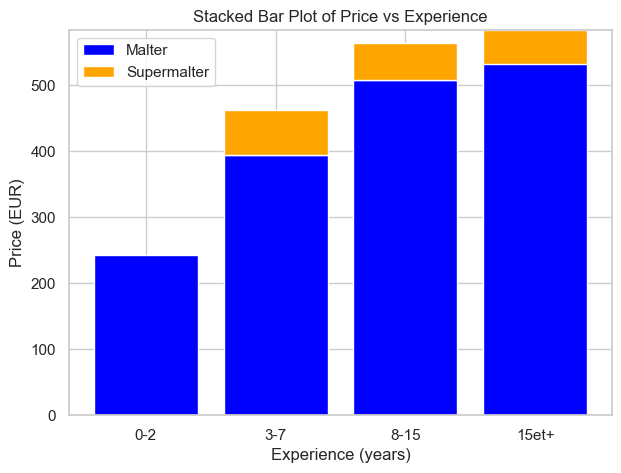

In [9]:
supermalter_data = df[df['supermalter'] == 1]
non_supermalter_data = df[df['supermalter'] == 0]


mean_price_supermalter = supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])
mean_price_non_supermalter = non_supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])


# bar_width = 0.35


fig, ax = plt.subplots(figsize=(7, 5))


ax.bar(mean_price_non_supermalter.index, mean_price_non_supermalter.values, label='Malter', color='blue')


ax.bar(mean_price_supermalter.index, (mean_price_supermalter.values - mean_price_non_supermalter.values),
       bottom=mean_price_non_supermalter.values, label='Supermalter', color='orange')


ax.set_xlabel('Experience (years)')
ax.set_ylabel('Price (EUR)')
ax.set_title('Stacked Bar Plot of Price vs Experience')
ax.legend()

plt.show()
plt.show()

SCATTERPLOT OF EXPERIENCE VS. TJM

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Price (EUR)'),
 Text(0.5, 1.0, 'Price vs Experience')]

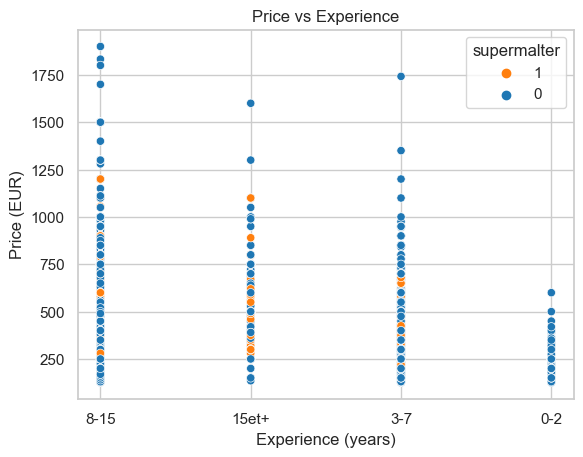

In [8]:
fig = sns.scatterplot(x='experience', y='price', data=df, hue='supermalter', hue_order=[1,0], palette=['#ff7f0e', '#1f77b4'])
fig.set(xlabel='Experience (years)', ylabel='Price (EUR)', title='Price vs Experience')

Does having more experience makes you more likely to be hired ?

[Text(0.5, 0, 'Experience (years)'),
 Text(0, 0.5, 'Missions'),
 Text(0.5, 1.0, 'Missions vs Experience')]

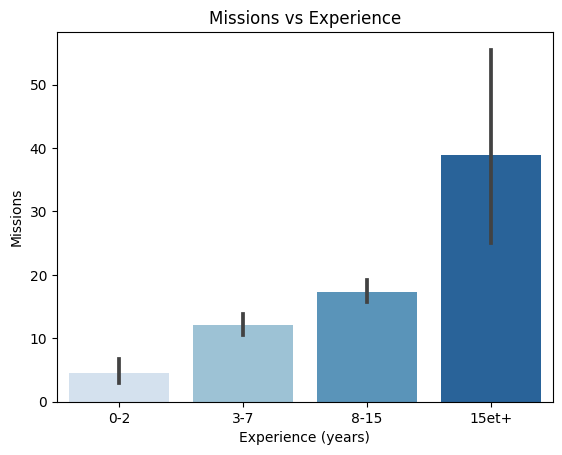

In [5]:
fig = sns.barplot(x='experience', y='missions', data=df, order=["0-2", "3-7", "8-15", "15et+"], palette="Blues") # default estimator is mean (to use median: estimator=np.median) NO REAL DIFFERENCE
fig.set(xlabel='Experience (years)', ylabel='Missions', title='Missions vs Experience')

number of supermalter per experience level (are there more supermalter in the most experienced freelancers ?)

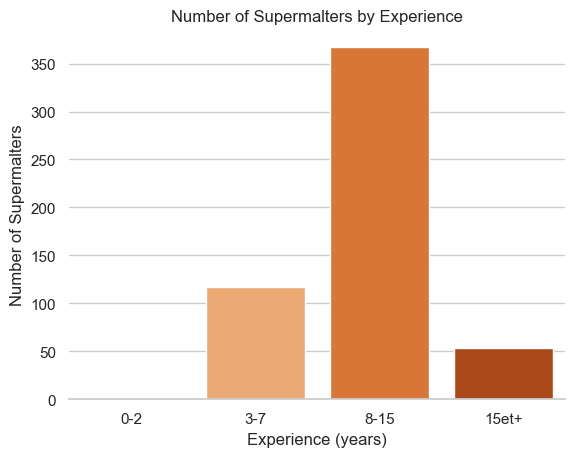

In [6]:
# Supermalter
supermalter_data = df[df['supermalter'] == 1]

# Group by 'experience' and count
supermalter_count = supermalter_data.groupby('experience').size().reset_index(name='count')

# Seaborn
sns.set(style="whitegrid")
sns.barplot(x='experience', y='count', data=supermalter_count, order=["0-2", "3-7", "8-15", "15et+"], palette='Oranges')
sns.despine(left=True)


plt.title('Number of Supermalters by Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Supermalters')


plt.show()